In [1]:
import re
import keras
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
MODEL_FILE = 'out/models/a-f0-e19-auc0.64986'
MSGS_DIR = 'out/msgs'
IMG_SHAPE = (96, 2048, 16)

In [3]:
test_files = pd.read_csv('sample_submission.csv').File.values
model = keras.models.load_model(MODEL_FILE)

In [4]:
def process_batch(files, msgs, model, res_df=None):
    msgs = np.array(msgs, dtype=np.float32).reshape((-1,) + IMG_SHAPE)
    y_p = model.predict(msgs, verbose=True, batch_size=32)
    batch_df = pd.DataFrame({'File': files, 'Class': y_p.T[0]})

    if res_df is None:
        return batch_df
    else:
        return res_df.append(batch_df)

In [5]:
BATCH_SIZE = 500
batch_files = []
batch_msgs = []
res_df = None

for f in tqdm(test_files):
    
    fid = re.findall(r'(.+)\.mat$', f)[0]
    batch_files.append(f)
    
    # read wave
    msgs_f = MSGS_DIR + '/' + fid + '.npy'
    msg = np.load(msgs_f)
    # move channel axis
    msg = np.swapaxes(msg, 0, 1)
    msg = np.swapaxes(msg, 1, 2)
    batch_msgs.append(msg)
    
    if len(batch_files) == BATCH_SIZE:
        res_df = process_batch(batch_files, batch_msgs, model, res_df)
        batch_files = []
        batch_msgs = []

if len(batch_files):
    res_df = process_batch(batch_files, batch_msgs, model, res_df)

  8%|▊         | 499/6126 [00:12<02:11, 42.84it/s]

500/500 [==============================] - 43s    


 16%|█▌        | 985/6126 [03:03<03:17, 25.99it/s]

500/500 [==============================] - 52s    


 24%|██▍       | 1499/6126 [06:13<02:23, 32.20it/s]

500/500 [==============================] - 52s    


 33%|███▎      | 1999/6126 [09:25<02:07, 32.40it/s]

500/500 [==============================] - 52s    


 41%|████      | 2499/6126 [12:39<01:50, 32.87it/s]

500/500 [==============================] - 48s    


 49%|████▉     | 2999/6126 [16:15<06:14,  8.35it/s]

500/500 [==============================] - 45s    


 57%|█████▋    | 3499/6126 [20:02<17:08,  2.55it/s]

500/500 [==============================] - 51s    


 65%|██████▌   | 3997/6126 [23:17<01:32, 23.02it/s]

500/500 [==============================] - 52s    

 65%|██████▌   | 4000/6126 [28:15<17:37:46, 29.85s/it]

 73%|███████▎  | 4497/6126 [28:33<01:15, 21.62it/s]

500/500 [==============================] - 51s    

 73%|███████▎  | 4500/6126 [31:32<8:07:02, 17.97s/it]

 82%|████████▏ | 4997/6126 [31:48<00:50, 22.36it/s]

500/500 [==============================] - 49s    

 82%|████████▏ | 5000/6126 [34:44<5:30:43, 17.62s/it]

 90%|████████▉ | 5497/6126 [35:00<00:27, 22.90it/s]

500/500 [==============================] - 50s    

 90%|████████▉ | 5500/6126 [37:56<3:03:35, 17.60s/it]

 98%|█████████▊| 5999/6126 [38:11<00:03, 32.23it/s]

500/500 [==============================] - 52s    


100%|██████████| 6126/6126 [41:14<00:00,  2.48it/s]


126/126 [==============================] - 9s     


In [6]:
res_df.to_csv('subm-d.csv', index=False, columns=['File', 'Class'], float_format='%.8f')

(array([  6.12100000e+03,   5.00000000e+00]),
 array([ 0.26894143,  0.26895303,  0.26896462]),
 <a list of 2 Patch objects>)

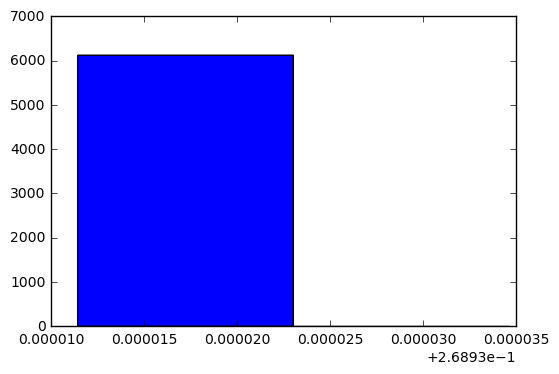

In [7]:
plt.hist(res_df.Class.values, bins=2)